## Algorithm for computing natural cubic splines
Cubic splines have polynomial pieces of the form ${\displaystyle P_{i}(x)=a_{i}+b_{i}(x-x_{i})+c_{i}(x-x_{i})^{2}+d_{i}(x-x_{i})^{3}.}$ Given ${\displaystyle k+1}$ coordinates ${\displaystyle (x_{0},y_{0}),(x_{1},y_{1}),\dots ,(x_{k},y_{k}),}$  we find ${\displaystyle k}$ polynomials ${\displaystyle P_{i}(x),}$ which satisfy for ${\displaystyle 1\leq i\leq k-1}$:

* ${\displaystyle P_{0}(x_{0})=y_{0}\quad }$ and ${\displaystyle \quad P_{i-1}(x_{i})=y_{i}=P_{i}(x_{i}),}$
* ${\displaystyle P'_{i-1}(x_{i})=P'_{i}(x_{i}),}$
* ${\displaystyle P''_{i-1}(x_{i})=P''_{i}(x_{i}),}$
* ${\displaystyle P''_{0}(x_{0})=P''_{k-1}(x_{k})=0.}$

One such polynomial ${\displaystyle P_{i}}$ is given by a 5-tuple ${\displaystyle (a,b,c,d,x)}$ where ${\displaystyle a,b,c\,}$  and ${\displaystyle d\,}$, correspond to the coefficients as used above and ${\displaystyle x}$ denotes the variable over the appropriate domain ${\displaystyle [x_{i},x_{i+1}]}$

### Computation of Natural Cubic Splines:
Input: a set of ${\displaystyle k+1}$ coordinates
Output: a spline as a set of polynomial pieces, each represented by a 5-tuple.

1. Create a new array a of size k + 1, and for ${\displaystyle i=0,\ldots ,k}$ set ${\displaystyle a_{i}=y_{i}}$
2. Create new arrays b, d and μ each of size k
3. Create a new array h of size k and for ${\displaystyle i=0,\ldots ,k-1}$ set ${\displaystyle h_{i}=x_{i+1}-x_{i}}$
4. Create a new array α of size k-1 and for ${\displaystyle i=1,\ldots ,k-1}$ set ${\displaystyle \alpha _{i}={\tfrac {3}{h_{i}}}(a_{i+1}-a_{i})-{\tfrac {3}{h_{i-1}}}(a_{i}-a_{i-1})}$
5. Create new arrays c, l, and z each of size ${\displaystyle k+1}$.
6. Set ${\displaystyle l_{0}=1,\;\mu _{0}=z_{0}=0}$
7. For ${\displaystyle i=1,\ldots ,k-1\,}$
    1. Set ${\displaystyle l_{i}=2(x_{i+1}-x_{i-1})-h_{i-1}\mu _{i-1}.}$
    2. Set ${\displaystyle \mu _{i}={\tfrac {h_{i}}{l_{i}}}.}$
    3. Set ${\displaystyle z_{i}={\tfrac {\alpha _{i}-h_{i-1}z_{i-1}}{l_{i}}}.}$
8. Set ${\displaystyle l_{k}=1;z_{k}=c_{k}=0.}$
9. For ${\displaystyle j=k-1,k-2,\ldots ,0}$
    1. Set ${\displaystyle c_{j}=z_{j}-\mu _{j}c_{j+1}}$
    2. Set ${\displaystyle b_{j}={\tfrac {a_{j+1}-a_{j}}{h_{j}}}-{\tfrac {h_{j}(c_{j+1}+2c_{j})}{3}}}$
    3. Set ${\displaystyle d_{j}={\tfrac {c_{j+1}-c_{j}}{3h_{j}}}.}$
10. Create the spline as a new set of polynomials and call it output_set. Populate it with k 5-tuples for the polynomials P.
11. For ${\displaystyle i=0,\ldots ,k-1}$
    1. Set Pi,a = ai
    2. Set Pi,b = bi
    3. Set Pi,c = ci
    4. Set Pi,d = di
    5. Set Pi,x = xi
12. Output output_set

[[ 6.    1.  ]
 [-3.5  -0.5 ]
 [ 0.    1.5 ]
 [ 0.25 -0.25]
 [ 3.    5.  ]]


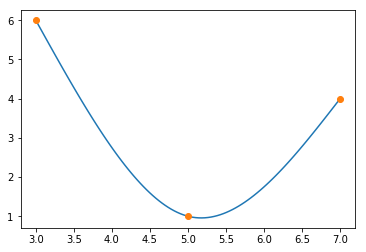

In [145]:
import numpy as np
#x = np.array([1,2,3,4,5,6,7], dtype=float)
#y = np.array([2,1,2,3,2,1,0], dtype=float)
x = np.array([3,5,7], dtype=float)
y = np.array([6,1,4], dtype=float)
# 1
k = x.size - 1
a = y
assert a.size == k + 1

# 2
b = np.full(k, np.inf)
d = np.full(k, np.inf)
mu = np.full(k, np.inf)
assert b.size == d.size == mu.size == k

# 3
h = (np.roll(x,-1) - x)[:k]
assert h.size == k

# 4
alpha = np.full(k, np.inf)
for i in range(k):
    if i == 0:
        continue
    alpha[i] = 3 / h[i] * (a[i+1] - a[i]) - 3 / h[i-1] * (a[i] - a[i-1])

assert alpha.size == k
assert alpha[0] == np.inf

# 5
c = np.full(k+1, np.inf)
l = np.full(k+1, np.inf)
z = np.full(k+1, np.inf)

# 6
l[0] = 1
mu[0] = z[0] = 0

# 7
for i in range(1,k):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1])/l[i]

# 8
l[k] = 1
z[k] = c[k] = 0

# 9
for j in range(k-1,-1,-1):    
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# 10 
output_set = np.full((5,k), np.inf)

# 11
for i in range(k):
    output_set[0,i] = a[i]
    output_set[1,i] = b[i]
    output_set[2,i] = c[i]
    output_set[3,i] = d[i]
    output_set[4,i] = x[i]

print(output_set)
#output_set = np.array([[6,1],[-7/2, -1/2], [0,3/2],[1/4, -1/4],[3,5]])
#print(output_set)

# plot data
X = np.linspace(start=x[0], stop=x[-1], num=100)
Y = np.full(X.size, np.inf)
idx = 0
for k in X:
    for j in range(len(x)-1):
        if x[j] <= k < x[j+1]:
            i = j
            break
    diff = k - output_set[4,i]
    Y[idx] = output_set[0,i] + output_set[1,i] * (diff) + output_set[2,i] * (diff)**2 + output_set[3,i] * (diff)**3
    idx+=1

plt.figure(1)
plt.plot(X, Y)
plt.plot(x, y, 'o')
plt.show()

In [149]:
t = np.array([0,1,2,3,4,5])
x = np.linspace(start=0, stop=5, num=100)
n = t.size - 1
k = 3
N = np.full((n,n), np.inf)

N[0,3] = 


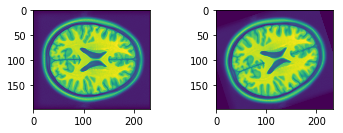

In [12]:
%reload_ext autoreload
%autoreload 2
import ImageRegistration as ir
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
# 1 Define images
## Moving Image
t1_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()
mi_data = t1_data[:, :, 94]
mi_spacing = np.array([1,1])
mi_origin = np.array([-mi_data.shape[0]/2,-mi_data.shape[1]/2])
f = ir.Image(mi_data, mi_spacing, mi_origin)

## Create ReferenceImage
theta_opt = np.pi/10
a_opt = np.cos(theta_opt)
b_opt = -np.sin(theta_opt)
tx_opt = 0
d_opt = np.sin(theta_opt)
e_opt = np.cos(theta_opt)
ty_opt = 0
T_opt = np.array([[a_opt, b_opt, tx_opt],[d_opt, e_opt, ty_opt],[0,0,1]], dtype=float)
r_spacing = np.array([1,1])
r_origin = np.array([-mi_data.shape[0]/2,-mi_data.shape[1]/2])
referenceImage = ir.Transform(mi_org, ir.Image(np.zeros(mi_data.shape), r_spacing, r_origin), T_opt, False)
ax = plt.subplot(2,2,1)
ax.imshow(f.Values)

ax = plt.subplot(2,2,2)
ax.imshow(referenceImage.Values)

In [23]:
#diff = referenceImage.Values - f.Values

# First precompute B-spline coefficients c(k,l) by separable filtering of the pixel values f(k,l). 
# Apply 1D filtering agorithm in box 2 successively along the rows and columns of the image.

# box 2 Fast cubic spline interpolation 
f1 = f.Values[1,:]
N = f1.size

z1 = -2 + np.sqrt(3)
s = 0
for i in range(N): #TODO
    s += f1[i]*z1**i

c_p = np.
c_p.append(1/(1-z1**(2*N-2)) * s)

for i in range(1,N):
    c_p.append(f1[i] + z1*c_p[i-1])

c_m = z1/(1-z1**2)*(c_p[N-1] + z1*c_p[N-2])


# Second, scan throught the image points in the transformed representation. 
# At each location (u,v) in the desitnation, determine the corresponding location (x,y) in the source and compute actual image value
# according to (17)

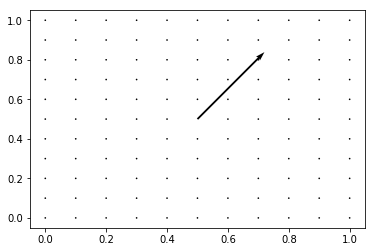

In [16]:
x = np.linspace(0,1,11)
y = np.linspace(1,0,11)
u = v = np.zeros((11,11))
u[5,5] = 0.2

plt.quiver(x, y, u, v, scale=1)

In [17]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9
